**<h1 align = "center">Toxic Comment Detection - Machine Learning</h1>**

## **INITIAL DATA ANALYSIS**<a id="8"></a>

### **2.1 Loading Our Datasets**<a id="3"></a>

In [ ]:
!ls /kaggle/input

In [1]:
import pandas as pd
toxic_df = pd.read_csv("/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip")

### **2.2 Initial Analysis On Our Datasets**<a id="4"></a>

In [ ]:
toxic_df.head()

In [ ]:
toxic_df.shape

### **2.3 Selecting The Required Columns**<a id="5"></a>

In [2]:
#We are going to select just the "comment_text" and "toxic" columns
toxic_df['Toxic'] = toxic_df.iloc[:, 2:].any(axis = 1)
selected_toxic_columns = toxic_df[['comment_text', 'Toxic']]
selected_toxic_columns

,comment_text,Toxic
0,Explanation\nWhy the edits made under my usern...,False
1,D'aww! He matches this background colour I'm s...,False
2,"Hey man, I'm really not trying to edit war. It...",False
3,"""\nMore\nI can't make any real suggestions on ...",False
4,"You, sir, are my hero. Any chance you remember...",False
...,...,...
159566,""":::::And for the second time of asking, when ...",False
159567,You should be ashamed of yourself \n\nThat is ...,False
159568,"Spitzer \n\nUmm, theres no actual article for ...",False
159569,And it looks like it was actually you who put ...,False


In [ ]:
selected_toxic_columns.describe()

In [ ]:
selected_toxic_columns.isnull().sum()

### **2.5 Handling Duplicates**<a id="7"></a>

In [ ]:
#Checking duplicates
selected_toxic_columns.duplicated(subset = ['comment_text'], keep = False).sum()

In [ ]:
#Printing the duplicated rows
duplicates = selected_toxic_columns[selected_toxic_columns.duplicated(subset = ['comment_text'], keep = False)]
duplicates

In [ ]:
#Dropping Duplicates
selected_toxic_columns.drop_duplicates(subset = ['comment_text'], keep = 'first', inplace = True)

In [ ]:
#Confirm Drops
selected_toxic_columns.duplicated(subset = ['comment_text'], keep = False).sum()

In [ ]:
selected_toxic_columns['Toxic'].value_counts()
#We can see from the code above that the data is imbalanced.

## **VISUALIZATION**<a id="8"></a>

### **3.1 Toxic vs Non-Toxic Comments Plot**<a id="9"></a>

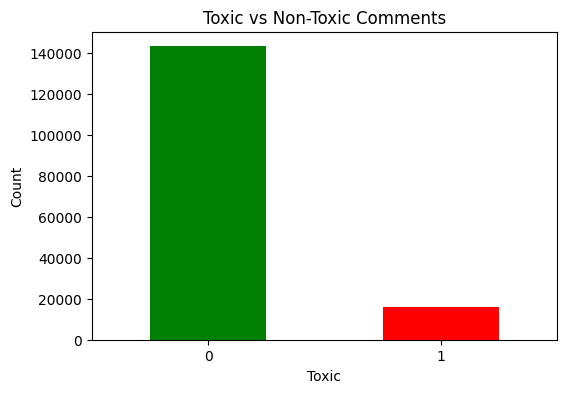

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
#Graphical representation of the Toxic column values (Toxic vs Non-Toxic Comments) distribution
plt.figure(figsize = (6, 4))
toxic_counts = selected_toxic_columns['Toxic'].value_counts()
toxic_counts.plot(kind = 'bar', color = ['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

### **3.2 Wordcloud for Toxic Comments**<a id="10"></a>

In [ ]:
#"Wordcloud" is for creating word cloud visualization.
from wordcloud import WordCloud
#Creating Word Cloud of Toxic Comments
toxic_comments = ''.join(selected_toxic_columns[selected_toxic_columns['Toxic']]['comment_text'])
toxic_words = WordCloud(width = 900, height = 450, background_color = "white").generate(toxic_comments)
plt.imshow(toxic_words, interpolation = 'bilinear')
plt.axis("off")
plt.title("Word Cloud For Toxic Comments")
plt.show()

### **3.3 Wordcloud for Non-Toxic Comments**<a id="11"></a>

In [ ]:
#Creating Word Cloud of Non-Toxic Comments
non_toxic_comments = ''.join(selected_toxic_columns[~selected_toxic_columns['Toxic']]['comment_text'])
non_toxic_words = WordCloud(width = 900, height = 450, background_color = "white").generate(non_toxic_comments)
plt.imshow(non_toxic_words, interpolation = 'bilinear')
plt.axis("off")
plt.title("Word Cloud For Non-Toxic Comments")
plt.show()

## **EXPLORATORY DATA ANALYSIS (EDA)**<a id="12"></a>

### **4.1 Replacing True and False Values**<a id="13"></a>

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Replacing True as 1 and False as 0. 
selected_toxic_columns['Toxic'] = selected_toxic_columns['Toxic'].replace({True: 1, False: 0})

/tmp/ipykernel_84/4186897982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_toxic_columns['Toxic'] = selected_toxic_columns['Toxic'].replace({True: 1, False: 0})


### **4.2 Text Preprocessing**<a id="14"></a>

In [4]:
#"re" is for regular expressions and text processing.
import re
#Cleaning the comment texts
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re'", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub("\W", " ", text)
    text = re.sub("\s+", " ", text)
    text = text.strip(" ")
    
    return text

selected_toxic_columns['comment_text'] = selected_toxic_columns['comment_text'].map(lambda cleaned : clean_text(cleaned))

/tmp/ipykernel_84/1853206681.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_toxic_columns['comment_text'] = selected_toxic_columns['comment_text'].map(lambda cleaned : clean_text(cleaned))


In [ ]:
selected_toxic_columns.head()

### **4.3 Text Processing Using TF-IDF**<a id="15"></a>

In [6]:
# """TF-IDF(Term Frequency-Inverse Document Frequency) is used for text analysis: 
# Text to Numerical Conversion, Feature Extraction, Dimensionality Reduction, Normalization & Scaling etc."""

from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(max_features = 5000, stop_words = 'english')
X = vector.fit_transform(selected_toxic_columns['comment_text'])
Y = selected_toxic_columns['Toxic']

# from transformers import BertTokenizer, BertModel
# import torch
# import numpy as np

# model_path = "/kaggle/input/bert-base-uncased/"

# tokenizer = BertTokenizer.from_pretrained(model_path)
# model = BertModel.from_pretrained(model_path)

# def get_bert_embeddings(texts):
#     embeddings = []
#     for text in texts:
#         inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
        
#         with torch.no_grad():
#             outputs = model(**inputs)
#             cls_embedding = outputs.last_hidden_state[:, 0, :]
#             embeddings.append(cls_embedding.squeeze().numpy())
    
#     return np.array(embeddings)

# texts = selected_toxic_columns['comment_text'].tolist()
# labels = selected_toxic_columns['Toxic']

# X = get_bert_embeddings(texts)
# Y = labels

### **4.4 Over-Sampling Using SMOTE**<a id="16"></a>

In [ ]:
selected_toxic_columns['Toxic'].value_counts()

In [7]:
#Recall that the data is imbalanced, so we have to balance it using SMOTE
from imblearn.over_sampling import SMOTE

#Initialize SMOTE
smote = SMOTE()

#Using SMOTE for oversampling
X_resampled, y_resampled = smote.fit_resample(X, Y)

#Converting oversampled data to DataFrame
resampled_df = pd.DataFrame(X_resampled.todense(), columns = vector.get_feature_names_out())
resampled_df['Toxic'] = y_resampled

In [ ]:
resampled_df['Toxic'].value_counts()

In [ ]:
#Plotting the new distribution sample
plt.figure(figsize = (6, 4))
toxic_counts = resampled_df['Toxic'].value_counts()
toxic_counts.plot(kind = 'bar', color = ['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

## **MODELLING**<a id="17"></a>

### **5.1 Splitting Our Dataset**<a id="18"></a>

In [8]:
from sklearn.model_selection import train_test_split
#Splitting the New Dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

### **5.2 Building Model**<a id="19"></a>

#### **5.2.1 Building Logistic Regression Model (Baseline 1)**<a id="22"></a>

In [9]:
from sklearn.linear_model import LogisticRegression

# logreg_model = LogisticRegression(
#     max_iter=1000,
#     solver='liblinear'
# )

logreg_model = SGDClassifier(
    loss='log_loss',
    max_iter=1000,
    penalty='l2',
    alpha=0.0001,
    learning_rate='optimal',
    random_state=42
)

#### **5.2.2 Building Feedforward Neural Network (FNN) Model (Baseline 2)**<a id="22"></a>

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# FNN
FNN_model = Sequential([
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

FNN_model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

2024-12-11 23:36:18.274195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-11 23:36:18.274378: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-11 23:36:18.437160: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


#### **5.2.3 Building Bidirectional GRU (BI-GRU) Model**<a id="22"></a>

In [11]:
from tensorflow.keras.layers import Reshape, Bidirectional, GRU
# BI-GRU
BI_GRU_model = Sequential([
    Reshape((1, X_train.shape[1]), input_shape=(X_train.shape[1],)),
    Bidirectional(GRU(64, return_sequences=False)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

BI_GRU_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### **5.3 Training Model**<a id="20"></a>

#### **5.3.1 Training Logistic Regression Model**<a id="22"></a>

In [60]:
from sklearn.metrics import accuracy_score

train_logres_model = logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_accuracy

0.9249550916479186

#### **5.3.2 Training Feedforward Neural Network (FNN) Model**<a id="22"></a>

In [13]:
train_FNN_model = FNN_model.fit(
    X_train.toarray(),
    y_train,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.2
)

y_pred_FNN = FNN_model.predict(X_test.toarray()).round().astype(int)
fnn_accuracy = accuracy_score(y_test, y_pred_FNN)
fnn_accuracy

Epoch 1/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - accuracy: 0.8885 - loss: 0.3032 - val_accuracy: 0.9310 - val_loss: 0.1801
Epoch 2/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.9404 - loss: 0.1623 - val_accuracy: 0.9441 - val_loss: 0.1505
Epoch 3/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.9542 - loss: 0.1309 - val_accuracy: 0.9536 - val_loss: 0.1301
Epoch 4/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9636 - loss: 0.1086 - val_accuracy: 0.9602 - val_loss: 0.1146
Epoch 5/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9704 - loss: 0.0911 - val_accuracy: 0.9655 - val_loss: 0.1024
Epoch 6/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9746 - loss: 0.0793 - val_accuracy: 0.9686 - val_loss: 0.0939
Epoch 7/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9783 - loss: 0.0705 - val_accuracy: 0.9717 - val_loss: 0.0875
Epoch 8/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9804 - loss: 0

0.9764558154135928

#### **5.3.2 Training Bidirectional GRU (BI-GRU) Model**<a id="22"></a>

In [14]:
train_BI_GRU_model = BI_GRU_model.fit(
    X_train.toarray(),
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

y_pred_BIGRU = BI_GRU_model.predict(X_test.toarray()).round().astype(int)
bigru_accuracy = accuracy_score(y_test, y_pred_BIGRU)
bigru_accuracy

Epoch 1/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 96s 16ms/step - accuracy: 0.8875 - loss: 0.2903 - val_accuracy: 0.9237 - val_loss: 0.2046
Epoch 2/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 89s 16ms/step - accuracy: 0.9280 - loss: 0.1947 - val_accuracy: 0.9261 - val_loss: 0.1971
Epoch 3/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 91s 16ms/step - accuracy: 0.9320 - loss: 0.1852 - val_accuracy: 0.9294 - val_loss: 0.1903
Epoch 4/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 92s 16ms/step - accuracy: 0.9362 - loss: 0.1726 - val_accuracy: 0.9315 - val_loss: 0.1831
Epoch 5/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 90s 16ms/step - accuracy: 0.9406 - loss: 0.1629 - val_accuracy: 0.9350 - val_loss: 0.1767
Epoch 6/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 90s 16ms/step - accuracy: 0.9442 - loss: 0.1526 - val_accuracy: 0.9389 - val_loss: 0.1692
Epoch 7/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 89s 15ms/step - accuracy: 0.9503 - loss: 0.1402 - val_accuracy: 0.9429 - val_loss: 0.1607
Epoch 8/10
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 90s 16ms/step - accuracy: 0.9571 -

0.9552137288756344

### **5.4 Visualizing Our Model**<a id="21"></a>

#### **5.4.1 Model Accuracy**<a id="22"></a>

##### **5.4.1.1 Model Accuracy for Logistic Regression**<a id="22"></a>

In [61]:
#Training vs Validation Accuracy
plt.figure(figsize = (6, 4))
plt.plot(train_logres_model.history['accuracy'])
plt.plot(train_logres_model.history['val_accuracy'])
plt.title('Model Accuracy for train_logres_model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'history'

<Figure size 600x400 with 0 Axes>

##### **5.4.1.2 Model Accuracy for FNN**<a id="22"></a>

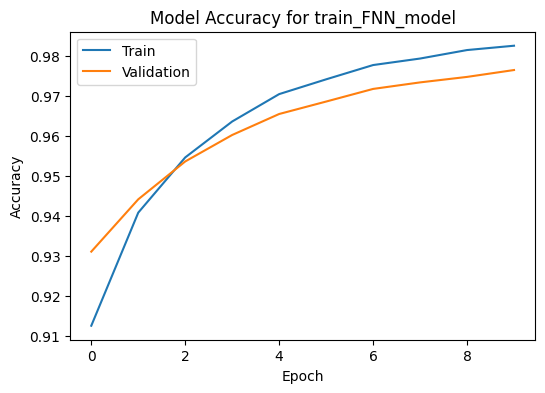

In [53]:
#Training vs Validation Accuracy
plt.figure(figsize = (6, 4))
plt.plot(train_FNN_model.history['accuracy'])
plt.plot(train_FNN_model.history['val_accuracy'])
plt.title('Model Accuracy for train_FNN_model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.savefig('FNN Model Accuracy.png')
plt.show()

##### **5.4.1.1 Model Accuracy for BI-GRU**<a id="22"></a>

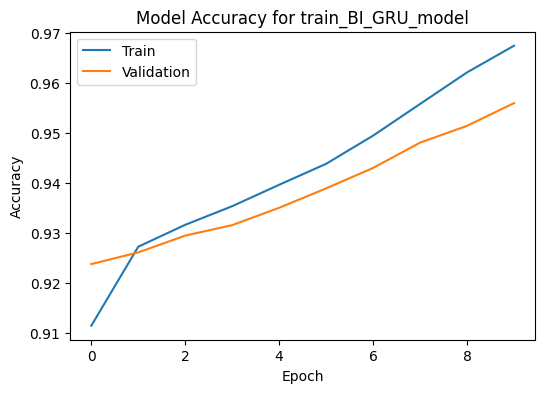

In [54]:
#Training vs Validation Accuracy
plt.figure(figsize = (6, 4))
plt.plot(train_BI_GRU_model.history['accuracy'])
plt.plot(train_BI_GRU_model.history['val_accuracy'])
plt.title('Model Accuracy for train_BI_GRU_model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.savefig('BIGRU Model Accuracy.png')
plt.show()

#### **5.4.2 Model Loss**<a id="23"></a>

##### **5.4.2.1 Model Loss for Logistic Regression**<a id="22"></a>

In [20]:
#Training vs Validation Loss
# plt.figure(figsize = (6, 4))
# plt.plot(train_logres_model.history['loss'])
# plt.plot(train_logres_model.history['val_loss'])
# plt.title('Model Loss for train_logres_model')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(['Train', 'Validation'], loc = 'upper left')
# plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'history'

<Figure size 600x400 with 0 Axes>

##### **5.4.2.2 Model Loss for FNN**<a id="22"></a>

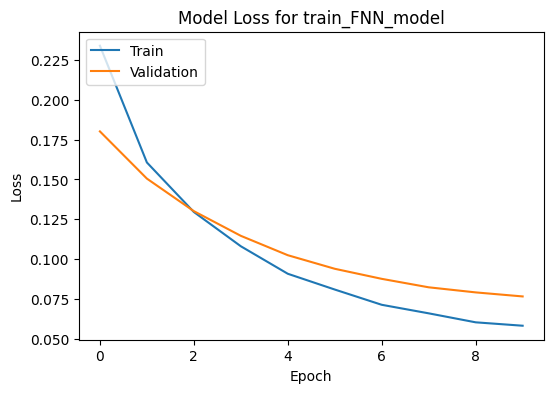

In [55]:
#Training vs Validation Loss
plt.figure(figsize = (6, 4))
plt.plot(train_FNN_model.history['loss'])
plt.plot(train_FNN_model.history['val_loss'])
plt.title('Model Loss for train_FNN_model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.savefig('FNN Model Loss.png')
plt.show()

##### **5.4.2.3 Model Loss for BI-GRU**<a id="22"></a>

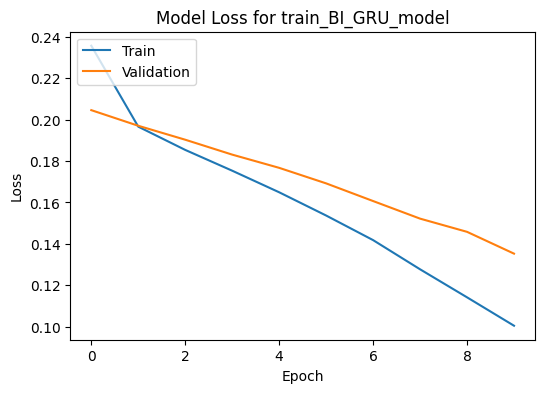

In [56]:
#Training vs Validation Loss
plt.figure(figsize = (6, 4))
plt.plot(train_BI_GRU_model.history['loss'])
plt.plot(train_BI_GRU_model.history['val_loss'])
plt.title('Model Loss for train_BI_GRU_model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.savefig('BIGRU Model Loss.png')
plt.show()

### **5.5 Model Accuracy Evaluation**<a id="24"></a>

#### **5.5.1 Model Accuracy Evaluation for Logistic Regression**<a id="24"></a>

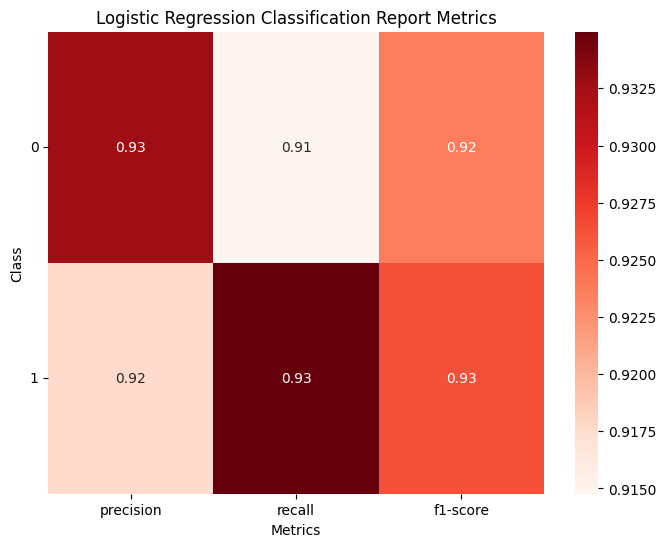

In [57]:
import seaborn as sns

#Predictions on Test Data
logres_y_pred_prob = train_logres_model.predict(X_test)
logres_y_pred = (y_pred_prob > 0.5).astype(int)

#Classification Report
logres_class_report = classification_report(y_test, logres_y_pred, output_dict = True)
logres_class_report_df = pd.DataFrame(logres_class_report).transpose()

#Dropping irrelevant metrics for Visualization
logres_class_metrics = logres_class_report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

#Classification Metrics Using Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(logres_class_metrics[['precision', 'recall', 'f1-score']], annot = True, cmap = 'Reds', fmt = '.2f')
plt.title("Logistic Regression Classification Report Metrics")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.yticks(rotation = 0)
plt.savefig('Logres Model Report.png')
plt.show()

#### **5.5.2 Model Accuracy Evaluation for FNN**<a id="24"></a>

1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


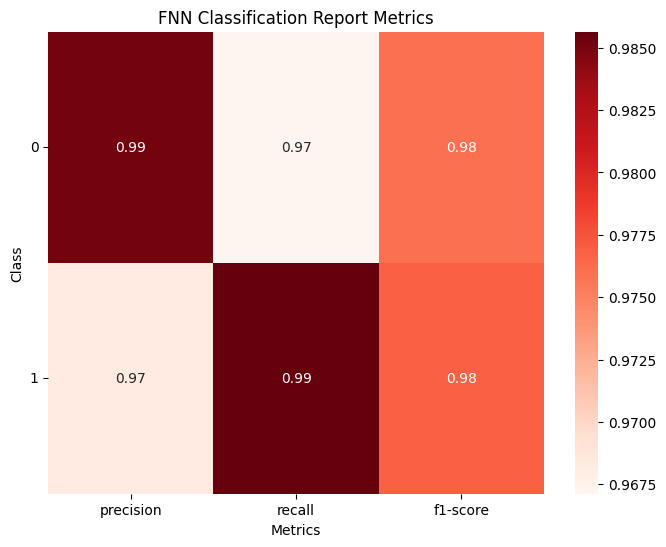

In [58]:
#Predictions on Test Data
FNN_y_pred_prob = FNN_model.predict(X_test)
FNN_y_pred = (FNN_y_pred_prob > 0.5).astype(int)

#Classification Report
FNN_class_report = classification_report(y_test, FNN_y_pred, output_dict = True)
FNN_class_report_df = pd.DataFrame(FNN_class_report).transpose()

#Dropping irrelevant metrics for Visualization
FNN_class_metrics = FNN_class_report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

#Classification Metrics Using Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(FNN_class_metrics[['precision', 'recall', 'f1-score']], annot = True, cmap = 'Reds', fmt = '.2f')
plt.title("FNN Classification Report Metrics")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.yticks(rotation = 0)
plt.savefig('FNN Model Report.png')
plt.show()

#### **5.5.3 Model Accuracy Evaluation for BI-GRU**<a id="24"></a>

1792/1792 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step


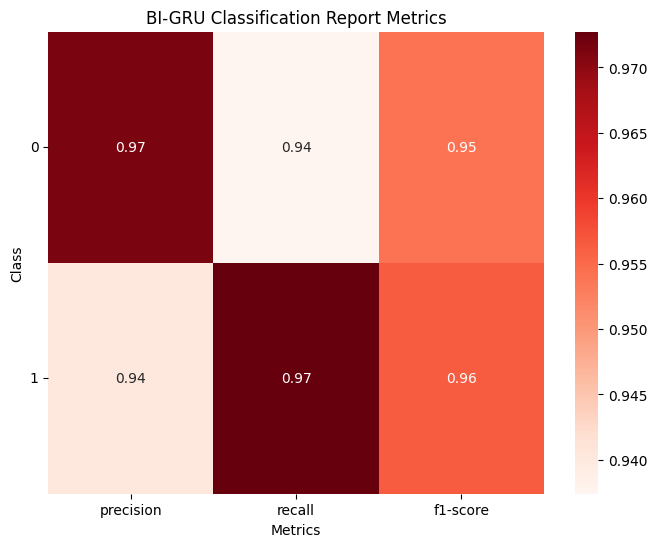

In [59]:
#Predictions on Test Data
X_test_dense = X_test.toarray()
BIGRU_y_pred_prob = BI_GRU_model.predict(X_test_dense)
BIGRU_y_pred = (BIGRU_y_pred_prob > 0.5).astype(int)

#Classification Report
BIGRU_class_report = classification_report(y_test, BIGRU_y_pred, output_dict = True)
BIGRU_class_report_df = pd.DataFrame(BIGRU_class_report).transpose()

#Dropping irrelevant metrics for Visualization
BIGRU_class_metrics = BIGRU_class_report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

#Classification Metrics Using Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(BIGRU_class_metrics[['precision', 'recall', 'f1-score']], annot = True, cmap = 'Reds', fmt = '.2f')
plt.title("BI-GRU Classification Report Metrics")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.yticks(rotation = 0)
plt.savefig('BIGRU Model Report.png')
plt.show()